In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

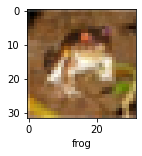

In [10]:
plot_sample(X_train, y_train, 0)

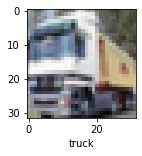

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Adding Artificial Neural Netword

In [13]:
ann = tf.keras.models.Sequential()

In [14]:
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))

In [15]:
ann.add(tf.keras.layers.Dense(units=3000 , activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=1000 , activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [18]:
ann.compile(optimizer='SGD' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [19]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 191s 120ms/step - loss: 1.8149 - accuracy: 0.3534
Epoch 2/10
1563/1563 [==============================] - 191s 122ms/step - loss: 1.6256 - accuracy: 0.4270
Epoch 3/10
1563/1563 [==============================] - 187s 120ms/step - loss: 1.5444 - accuracy: 0.4536
Epoch 4/10
1563/1563 [==============================] - 183s 117ms/step - loss: 1.4854 - accuracy: 0.4762
Epoch 5/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.4356 - accuracy: 0.4954
Epoch 6/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.3927 - accuracy: 0.5079
Epoch 7/10
1563/1563 [==============================] - 189s 121ms/step - loss: 1.3540 - accuracy: 0.5254
Epoch 8/10
1563/1563 [==============================] - 185s 118ms/step - loss: 1.3197 - accuracy: 0.5377
Epoch 9/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.2877 - accuracy: 0.5468
Epoch 10/10
1563/1563 [=======================

Adding CNN

In [20]:
cnn = tf.keras.models.Sequential()

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))

In [22]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [24]:
cnn.add(tf.keras.layers.Flatten())

In [25]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [26]:
cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [27]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 90s 56ms/step - loss: 1.5468 - accuracy: 0.4425
Epoch 2/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2164 - accuracy: 0.5720
Epoch 3/15
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0843 - accuracy: 0.6194
Epoch 4/15
1563/1563 [==============================] - 88s 56ms/step - loss: 1.0028 - accuracy: 0.6488
Epoch 5/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9406 - accuracy: 0.6734
Epoch 6/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8993 - accuracy: 0.6869
Epoch 7/15
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8576 - accuracy: 0.7021
Epoch 8/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8245 - accuracy: 0.7146
Epoch 9/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7927 - accuracy: 0.7233
Epoch 10/15
1563/1563 [==============================] - 88s 56m

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 22ms/step - loss: 0.9700 - accuracy: 0.6820


[0.9700334072113037, 0.6819999814033508]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 20ms/step


array([[1.2106204e-01, 4.8134199e-04, 5.9742004e-02, 9.8659617e-01,
        1.4949903e-01, 3.8474751e-01, 1.5756848e-01, 3.2214869e-02,
        7.0029724e-01, 6.8156398e-04],
       [9.9412549e-01, 9.9977535e-01, 4.5265548e-02, 4.0854748e-02,
        2.8426928e-05, 4.4562777e-05, 2.0336086e-04, 1.9364181e-06,
        9.9983013e-01, 4.2116787e-02],
       [6.3602847e-01, 9.7560972e-01, 7.3393367e-02, 2.8857443e-01,
        1.6014053e-02, 1.2511938e-02, 1.5353168e-02, 5.0896336e-03,
        9.8352748e-01, 7.5954187e-01],
       [9.9708277e-01, 4.6720967e-02, 7.0744789e-01, 4.2066333e-01,
        3.3538923e-02, 3.2957257e-03, 5.1283035e-02, 6.2919740e-04,
        9.0440977e-01, 4.5187329e-03],
       [8.9246387e-05, 6.0981167e-03, 8.9370894e-01, 9.3020266e-01,
        9.8890686e-01, 5.7441503e-01, 9.9631989e-01, 4.4731447e-03,
        3.9631492e-03, 5.6241121e-04]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

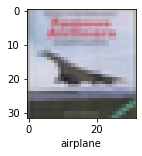

In [33]:
plot_sample(X_test, y_test,3)

In [34]:
classes[y_classes[3]]

'airplane'

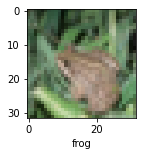

In [35]:
plot_sample(X_test, y_test,4)

In [36]:
classes[y_classes[4]]

'frog'

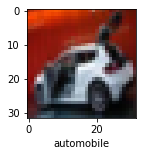

In [37]:
plot_sample(X_test , y_test , 6)

In [38]:
classes[y_classes[6]]

'automobile'

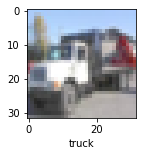

In [39]:
plot_sample(X_test , y_test , 45)

In [40]:
classes[y_classes[45]]

'truck'

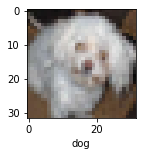

In [42]:
plot_sample(X_test , y_test , 1000)

In [44]:
classes[y_classes[1000]]

'dog'